In [72]:
#import important libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [73]:
wine=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [74]:
wine.describe()  # to get idea about data set mean medain std etc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


observation 'free sulfur dioxide', 'total sulfur dioxide' column seems have more daviation and outliers we will cross check further 

In [75]:
wine.isnull().sum()  #to check NAN values 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

no null values 

In [76]:
wine.info()  #to fetch info about data type and how many columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:>

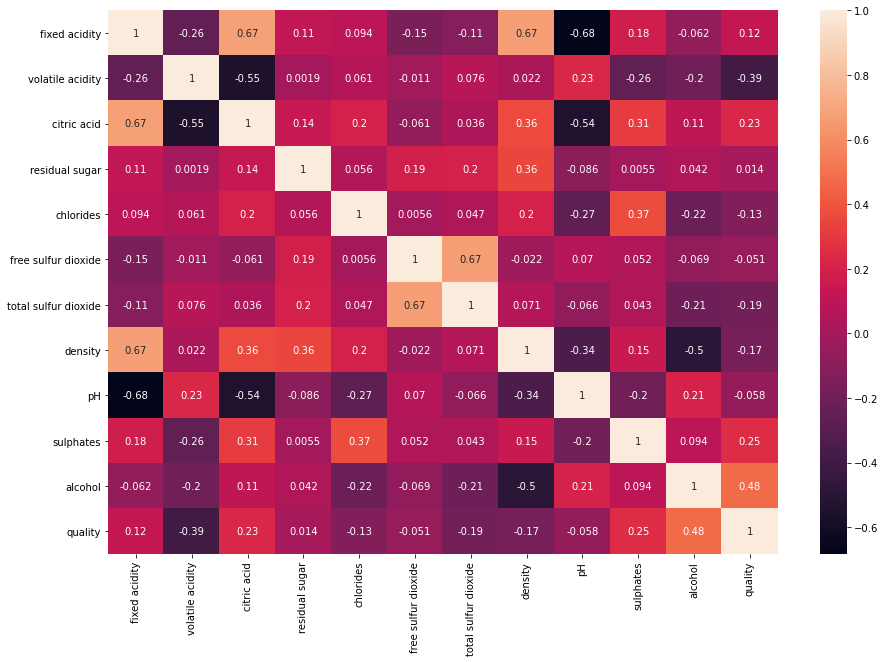

In [77]:
#check multicolliniarity 
plt.figure(figsize=(15,10))
correlation=wine.corr()
sns.heatmap(correlation,annot=True,fmt='.2g',)

In [62]:
corr_matrix=wine.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

lets visualize relation between quality of wine  with features through distribution plot

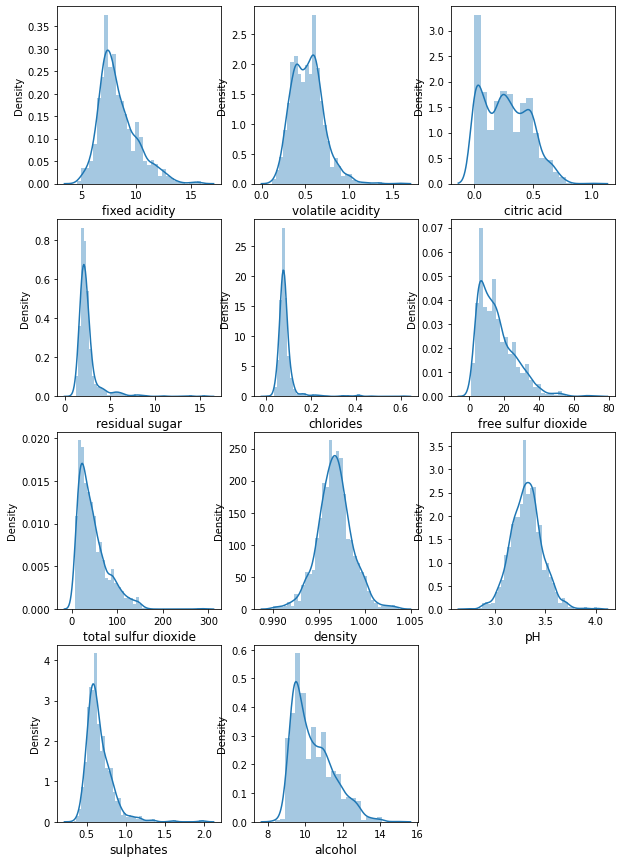

In [63]:
plt.figure(figsize=(10,15))
plotnumber=1
for column in wine:
    if plotnumber<12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(wine[column])
        plt.xlabel(column,fontsize=12)
        plotnumber+=1
plt.show()

'residual sugar' ,'chlorides', 'freesulfur dioxide','total sulfur dioxide','sulphates',column are with outiers lets use box plot to detect outliers 

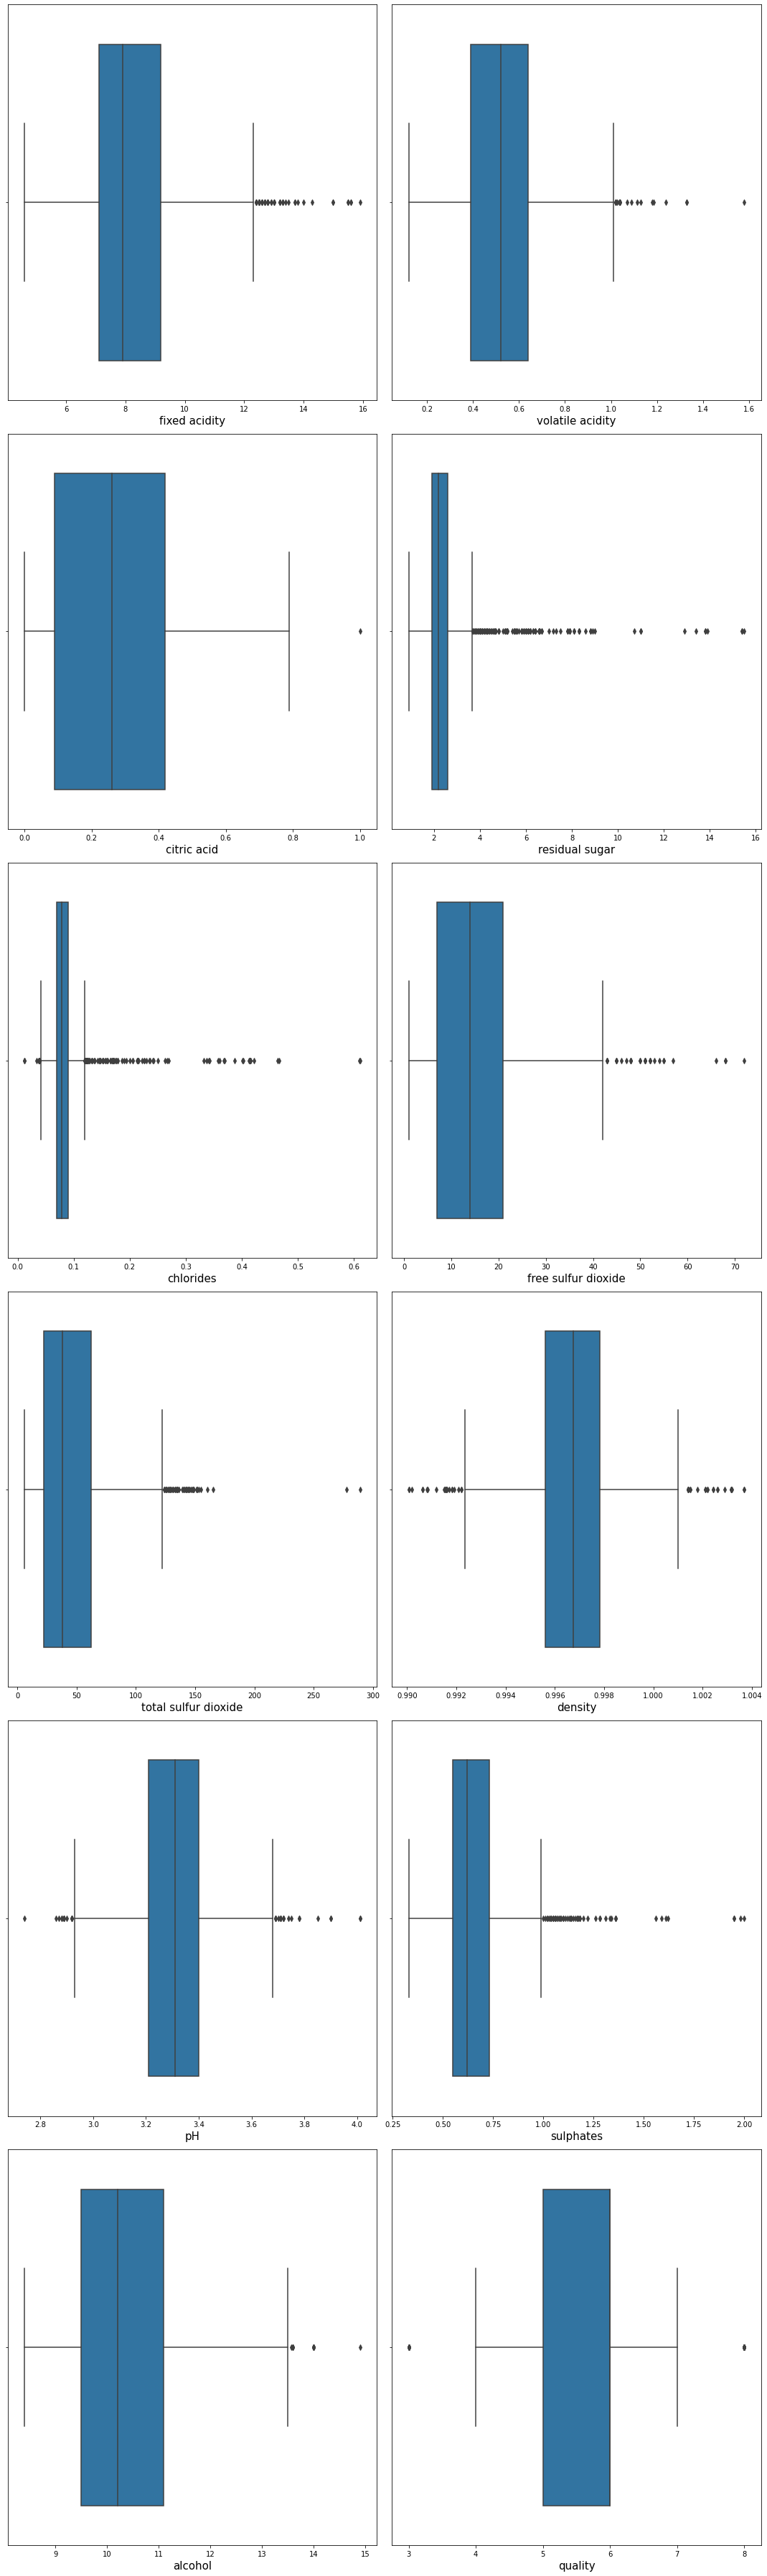

In [64]:
#Visualize the outliers using boxplot
plt.figure(figsize=(15,50))
graph=1
for column in wine:
    if graph<=12:
        ax=plt.subplot(6,2,graph)
        ax=sns.boxplot(wine[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.tight_layout()  

In [65]:
#with std 3 lets see the stats 
from scipy.stats import zscore
z_score= zscore(wine[['residual sugar','chlorides','total sulfur dioxide','sulphates']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
wine=wine[filtering_entry]
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,8.319577,0.526895,0.264471,2.399372,0.081487,15.417989,44.185847,0.996692,3.318552,0.642804,10.451290,5.648810
std,1.748253,0.178299,0.192943,0.883400,0.021935,9.882360,29.722768,0.001852,0.150840,0.130615,1.061058,0.812101
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995560,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996700,3.320000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.089000,21.000000,59.250000,0.997800,3.410000,0.720000,11.100000,6.000000
max,15.600000,1.580000,0.790000,6.700000,0.226000,57.000000,145.000000,1.003200,4.010000,1.160000,14.000000,8.000000


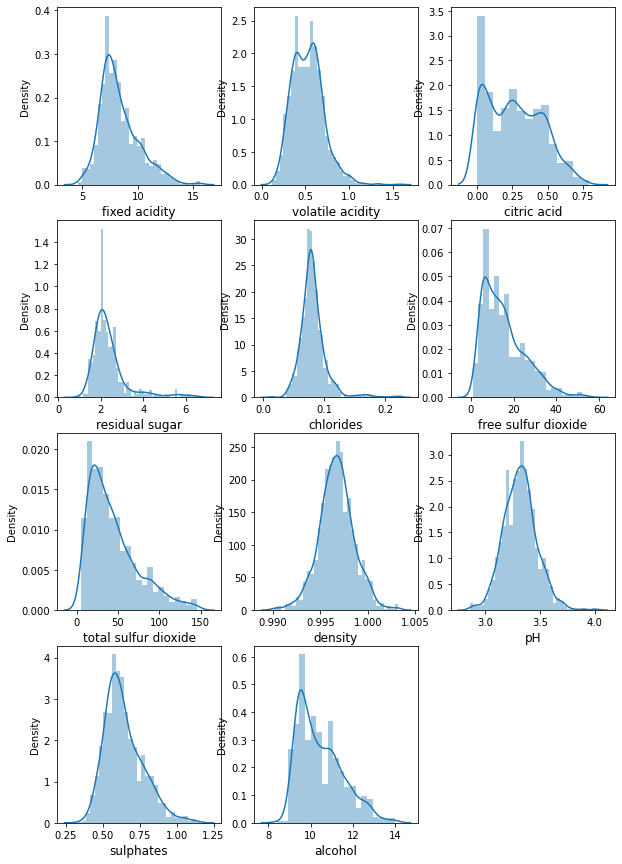

In [66]:
#after removing outliers lets again see our data distribution
plt.figure(figsize=(10,15))
plotnumber=1
for column in wine:
    if plotnumber<12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(wine[column])
        plt.xlabel(column,fontsize=12)
        plotnumber+=1
plt.show()

much betterr distribution now lets proceed further 

In [78]:
from sklearn.preprocessing import LabelEncoder
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [79]:
label=LabelEncoder()

In [80]:
wine['quality']=label.fit_transform(wine['quality'])

<AxesSubplot:xlabel='quality', ylabel='count'>

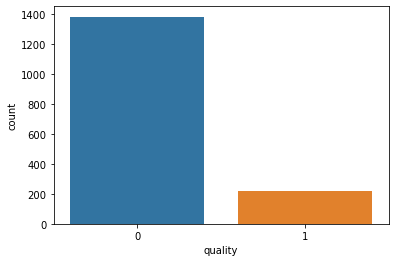

In [81]:
sns.countplot(wine['quality'])

Building Model

In [92]:
#Now seperate the dataset in target variable and feature variabes
X = wine.drop('quality', axis = 1)
Y = wine['quality']

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(X)

In [95]:
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=.2,random_state=10)

In [96]:
#fit the training data in to decesion tree model
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [97]:
dt.score(x_train,y_train)

1.0

In [98]:
y_pred=dt.predict(x_test)

In [116]:
confusion_matrix(y_pred,y_test)

array([[246,  22],
       [ 24,  28]], dtype=int64)

246 are true postive and 28 are true negative ,and 24 22 are false negative and flase positive respectively 

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       270
           1       0.54      0.56      0.55        50

    accuracy                           0.86       320
   macro avg       0.73      0.74      0.73       320
weighted avg       0.86      0.86      0.86       320



# Hyperparameter Tuning

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
#lets tune three hyperparameter right now,we are pasing the diffrent values for both parameters
grid_param={'criterion':['gini','entropy'],
           'max_depth': range(2,10,3),
           'min_samples_leaf':range(1,10,2),
           'min_samples_split':range(2,10,2)}

In [108]:
#cv= cross validation ,n_jobs menas apply entire CPU to do the job so that in increase process 
grid_search=GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1) 

In [109]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [110]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 9,
 'min_samples_split': 8}

In [112]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=9,min_samples_split=8)

In [114]:
dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=8, min_samples_leaf=9, min_samples_split=8)

In [115]:
dt.score(x_train,y_train)

0.9202501954652071

# Cross Validation of model

In [122]:
from sklearn.model_selection import KFold,cross_val_score

In [127]:
cross_val_score(dt,x_scaler,Y,cv=7)

array([0.89082969, 0.84279476, 0.80786026, 0.90789474, 0.82894737,
       0.88596491, 0.8377193 ])

In [129]:
cross_val_score(dt,x_scaler,Y,cv=7).mean()

0.8549266178546804

so on cross validation score and decesion tree score slightly differ our model is slightly overfitted 

In [131]:
#lets use KNN classifier to build mode
from sklearn.neighbors import KNeighborsClassifier

In [132]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [133]:
y_pred=knn.predict(x_test)

In [134]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[258,  12],
       [ 34,  16]], dtype=int64)

In [135]:
#cross validation 
cross_val_score(knn,x_scaler,Y,cv=9).mean()

0.8536222377395486

In [137]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [139]:
auc=roc_auc_score(y_test,y_pred)
auc

0.6377777777777778

In [146]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
print(fpr,tpr,thresholds)

[0.         0.04444444 1.        ] [0.   0.32 1.  ] [2 1 0]


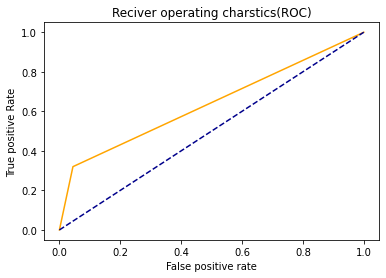

In [147]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC_curve(area=%0.3f)'% auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive Rate')
plt.title('Reciver operating charstics(ROC)')
plt.show()

MOdel Saving

In [151]:
import pickle
file='pikle_dt_model'
with open(file ,'wb') as file:
    pickle.dump(dt, file) #dt decesion tree model saving